
# aSPEM Experiment : analysis

https://scikit-learn.org/stable/auto_examples/neighbors/plot_nearest_centroid.html#sphx-glr-auto-examples-neighbors-plot-nearest-centroid-py




TODO: tester qu'à chaque pause, l'agent se réinitialise à $\hat{p}=.5$

In [1]:
%load_ext autoreload
%autoreload 2
#from __future__ import division, print_function, absolute_import
import glob
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
exts = ['.png', '.svg', '.pdf']

In [3]:
%matplotlib inline
fig_width = 15
dpi = 400
from aSPEM import aSPEM
import bayesianchangepoint as bcp

In [4]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)

In [5]:
msfigpath = '../PasturelMontagniniPerrinet2019/figures'
#COLOR = ['black','dimgrey','grey','darkgrey','silver','rosybrown','lightcoral','indianred','firebrick','brown', 'darkred','red']
list_sujet = ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','SR','TN','YK']

nb_sujet = len(list_sujet)
COLOR = ['b', 'r', 'k', 'g', 'm', 'c',
         'darkblue', 'darkred', 'peru', 'darkgreen', 'darkmagenta', 'darkcyan'] #[(0+(1/nb_sujet)*n, 0, 0, 0.5) for n in range(nb_sujet)]

In [6]:
from aSPEM import Analysis
e = Analysis(name_file_fit='fct_velocity_sigmo')

## Data Scalling

In [7]:
data_scalling = e.Data_Scalling()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
new_bet = data_scalling['new_bet_full']
new_va = data_scalling['new_va_full']

## Find h

In [9]:
h_bet, h_va = e.Find_h(new_bet, new_va)

AM BMC CS DC FM IP LB OP RS SR TN YK 

In [10]:
fig_width = 15
t_titre = 70
t_label = (30*4)/3

In [11]:
def regress(ax, p, data, c, minx=0, miny=0, maxx=1, maxy=1, t_label=t_label) :
    from scipy import stats
    slope, intercept, r_, p_value, std_err = stats.linregress(p, data)
    x_test = np.linspace(np.min(p), np.max(p), 100)
    fitLine = slope * x_test + intercept
    ax.plot(x_test, fitLine, c=c, linewidth=2)
    
    ax.text(maxx-((maxx-minx)/10), miny+((maxy-miny)/10), 'r = %0.3f\np_value = %0.3f'%(r_, p_value), fontsize=t_label/1.2, ha='right', color=c)
    return ax

In [12]:
def scatter_mean(bet, va, maxx=0.55, maxy=0.25, ex=0.02, ey=0.01, log=True, cent=False, 
                 triangle=True, color=False, mean='mean', fig_width=10) :
    
    if triangle is True : from matplotlib.patches import Polygon
    
    
    fig, axs = plt.subplots(1, 1, figsize=((fig_width), (fig_width)), constrained_layout=True) #/(1.6180*1))
    
    if type(bet)==dict :
        list_bet, list_va = [], []
        l_100_bet, l_100_va = [], []
        for s in list_sujet :
            list_bet.append(bet[s]) ; list_va.append(va[s])
            l_100_bet.append(h_bet['100'][s]) ; l_100_va.append(h_va['100'][s])
            
        bet, va = list_bet, list_va
    
    m_bet, m_va = [], []
    for x in range(len(bet)):
        if color is False : c = 'k'
        else :              c = color[x]
        
        if cent is True : axs.scatter(l_100_bet[x], l_100_va[x], color=c,  s=25, alpha=0.9)
        
        if triangle is True :
            c_b = ['k', 'grey', 'r']
            #for b in range(3) : axs.scatter(bet[x][b], va[x][b], c=c, s=50)
            baba = np.array([[bet[x][y], va[x][y]] for y in range(len(va[x]))])
            poly = Polygon(baba, color=c, alpha=0.2, lw=2)
            axs.add_artist(poly)
            
        if mean=='mean' :      mean_bet, mean_va = np.mean(bet[x]),   np.mean(va[x])
        elif mean=='mediane' : mean_bet, mean_va = np.median(bet[x]), np.median(va[x])           
            
        
        '''if log is False :
            if triangle is True :
                #axs.scatter(mean_bet, mean_va, color=c,  s=50, alpha=0.9)
                axs.text(mean_bet, mean_va, list_sujet[x], fontsize=12, va='center', ha='center')'''
            
        m_bet.append(mean_bet)
        m_va.append(mean_va)

    axs.plot(np.arange(-10,10), np.arange(-10,10), '--k')
    axs.vlines(0.025, -ey, 0.025, colors='k')
    axs.hlines(0.025, -ex, 0.025, colors='k')
    

    axs.set_xlabel('h$_{bet}$', fontsize=t_label)
    axs.set_ylabel('h$_{v_a}$', fontsize=t_label)
    axs.tick_params(axis='both', labelsize=t_label/1.8)
    
    
    if log:
        axs.set_xscale('log')
        axs.set_yscale('log')
        axs.axis([10**-5.5, 10**0, 10**-2.3, 10**0])
    else :
        axs.axis([-ex ,maxx+ex,-ey,maxy+ey])

    
    fig.tight_layout()
    #plt.show()
    return fig, axs

In [13]:
COLOR = ['crimson', 'saddlebrown', 'k', 'darkseagreen', 'dimgrey', 'teal',
         'slateblue', 'firebrick', 'peru', 'darkolivegreen', 'goldenrod', 'darkcyan']

Moyenne par Sujet block log


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


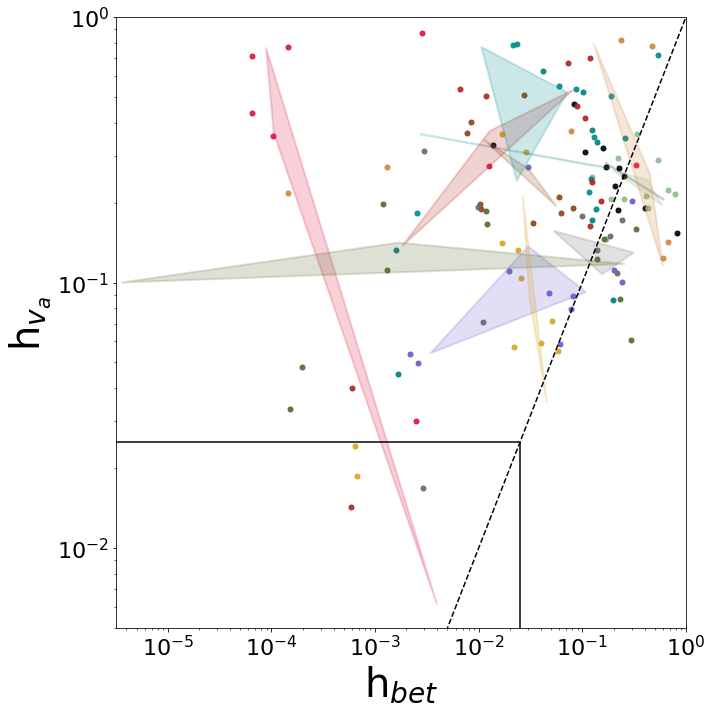

In [14]:
print('Moyenne par Sujet block log')

fig, ax = scatter_mean(h_bet['block'], h_va['block'], maxx=1, maxy=1, ex=0.02, ey=0.01,
                       color=COLOR, cent=True)

#for ext in exts: fig.savefig(f'{msfigpath}/5_inter-individual_differences_fit' + ext, dpi=dpi)

## Calcule MI

In [15]:
Full = e.Full_list()

In [16]:
def mutual_information(hgram):
    """ Mutual information for joint histogram
    https://matthew-brett.github.io/teaching/mutual_information.html"""
    # Convert bins counts to probability values
    pxy = hgram / float(np.sum(hgram))
    px = np.sum(pxy, axis=1) # marginal for x over y
    py = np.sum(pxy, axis=0) # marginal for y over x
    px_py = px[:, None] * py[None, :] # Broadcast to multiply marginals
    # Now we can do the calculation using the pxy, px_py 2D arrays
    nzs = pxy > 0 # Only non-zero pxy values contribute to the sum
    return np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))

def mumu(p, data) :
    hist, x_edges, y_edges = np.histogram2d(p, data ,bins=20)
    return mutual_information(hist)

In [17]:
mu_bet,mu_va = [], []
for suj in list_sujet :
    for b in range(3) :
        result = Full[Full.sujet==suj]['results'][200*b:200*(b+1)]
        va = Full[Full.sujet==suj]['va'][200*b:200*(b+1)]
        
        bino = Full[Full.sujet==suj]['bino'][200*b:200*(b+1)]
        
        p_hat_bet, p_hat_va = [], []
        liste = [0,50,100,150,200]
        for s in range(len(liste)-1) :
            
            p_bar, r_bar, beliefs = bcp.inference(np.asarray(bino[liste[s]:liste[s+1]]), h=h_bet['block'][suj][b], p0=.5)
            p_hat, r_hat = bcp.readout(p_bar, r_bar, beliefs, mode='mean')
            p_hat_bet.extend(p_hat)

            p_bar, r_bar, beliefs = bcp.inference(np.asarray(bino[liste[s]:liste[s+1]]), h=h_va['block'][suj][b], p0=.5)
            p_hat, r_hat = bcp.readout(p_bar, r_bar, beliefs, mode='mean')
            p_hat_va.extend(p_hat)
            
        mu_bet.append(mumu(p_hat_bet, result))
        
        proba = np.ma.masked_array(p_hat_va, mask=np.isnan(va.tolist())).compressed()
        data = np.ma.masked_array(va.tolist(), mask=np.isnan(va.tolist())).compressed()

        mu_va.append(mumu(proba, data))

In [18]:
print(np.nanmean(mu_bet), np.nanstd(mu_bet))
print(np.nanmean(mu_va), np.nanstd(mu_va))

1.0255601237296388 0.3418048976669125
0.7426902388779366 0.20955591546288668


In [19]:
HBET, HVA = [], []
for suj in list_sujet :
    HBET.extend(h_bet['block'][suj])
    HVA.extend(h_va['block'][suj])

In [20]:
print(np.nanmean(HBET), np.nanstd(HBET))
print(np.nanmean(HVA), np.nanstd(HVA))

0.1387997664369719 0.18012915544859032
0.2619282403949119 0.1957761085243669


# Kmean

In [21]:
from sklearn.cluster import KMeans

In [22]:
X0, X10, y = [[],[]], [[],[]], []

for s, suj in enumerate(list_sujet) :
    for b in range(len(h_bet['100'][suj])) :
        X0[0].append(h_bet['100'][suj][b])
        X0[1].append(h_va['100'][suj][b])
        X10[0].append(np.log10(h_bet['100'][suj][b]))
        X10[1].append(np.log10(h_va['100'][suj][b]))
        y.append(s)
X0 = np.array(X0)
X10 = np.array(X10)
y = np.array(y)
X0 = X0.transpose()
X10 = X10.transpose()

In [23]:
COLOR = ['crimson',
 'saddlebrown',
 'grey',
 'darkseagreen',
 'dimgrey',
 'r',
 'slateblue',
 'w',
 'peru',
 'darkolivegreen',
 'goldenrod',
 'c']

from matplotlib.colors import ListedColormap
cmap = ListedColormap(COLOR) #ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

In [24]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing as pre
from sklearn.ensemble import RandomForestClassifier


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


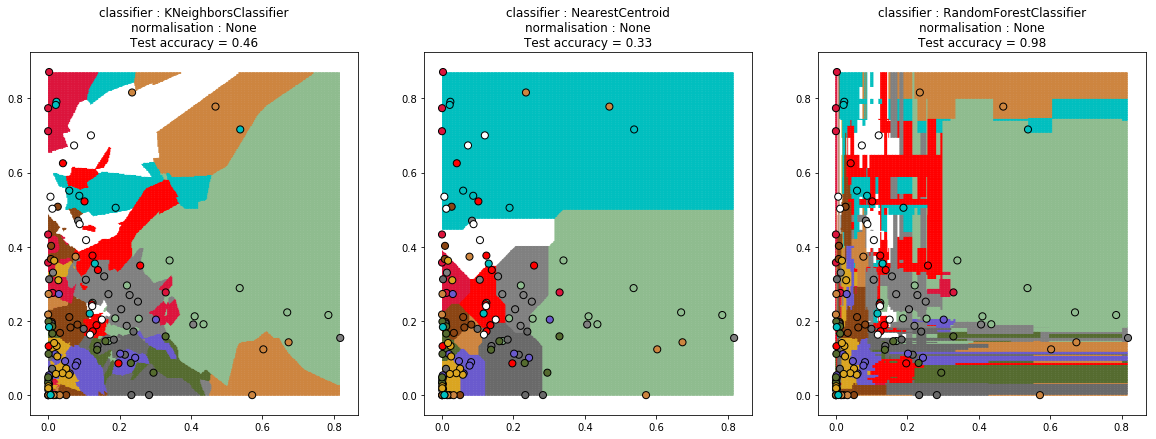

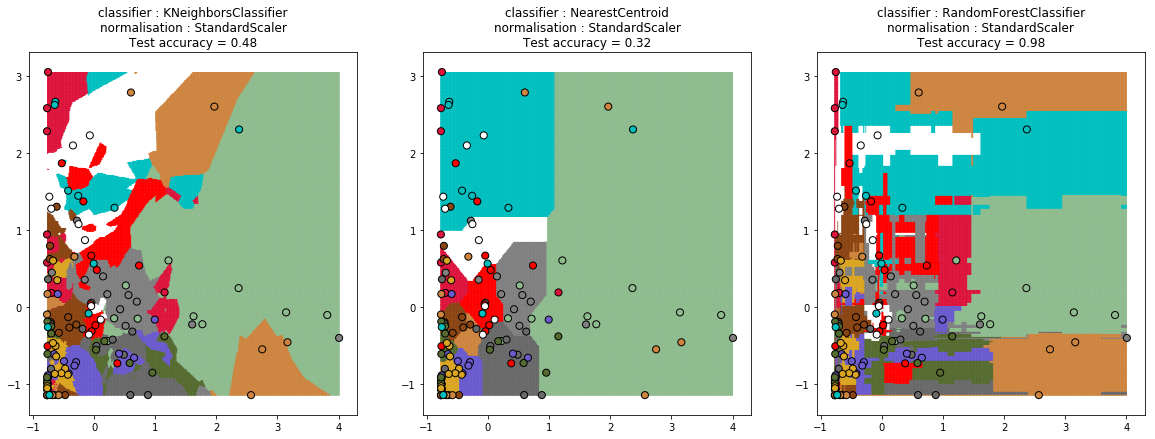

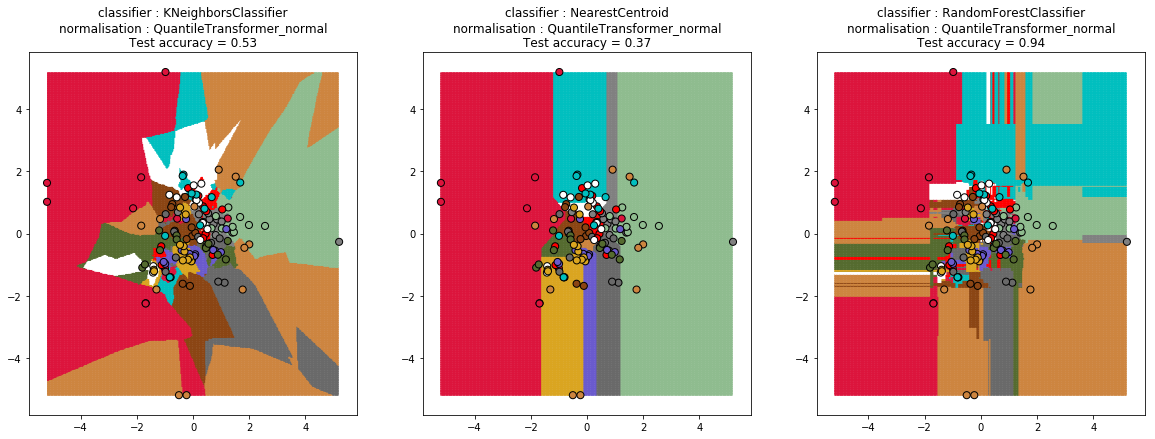

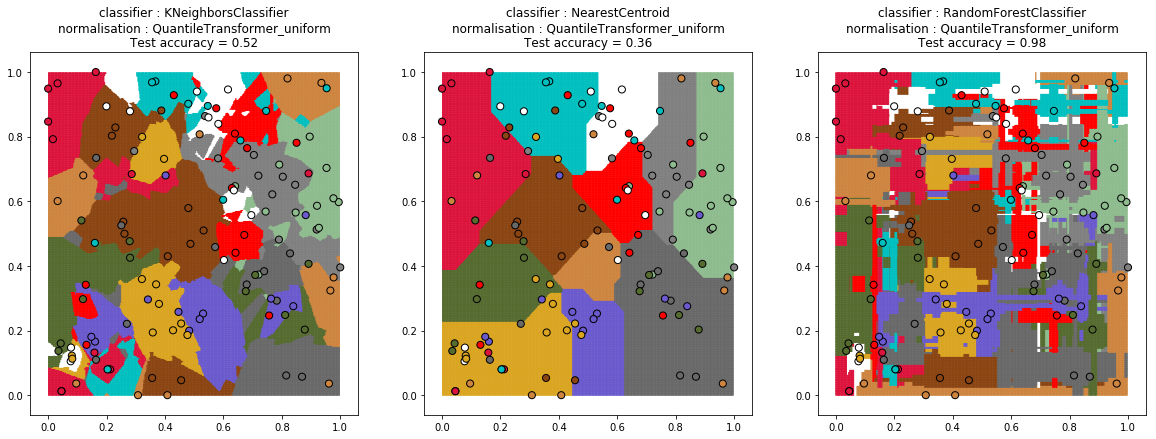

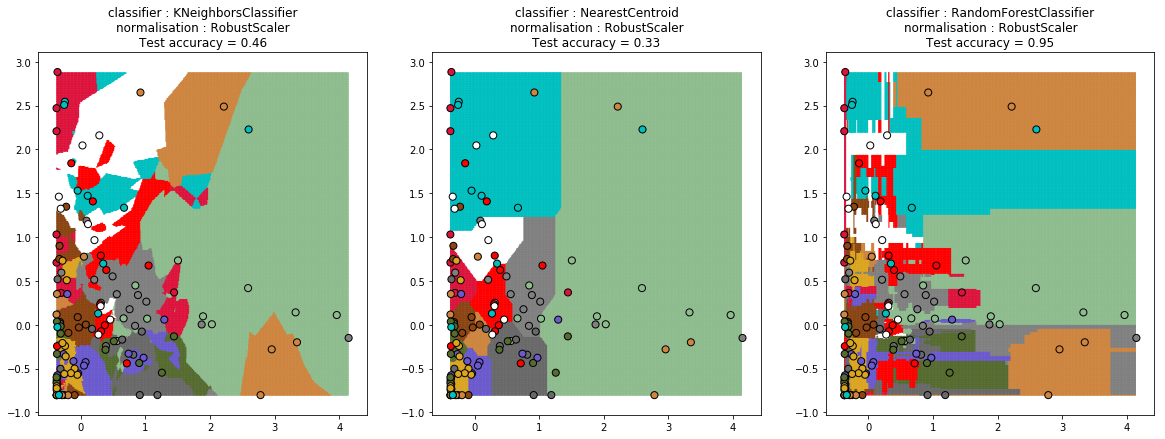

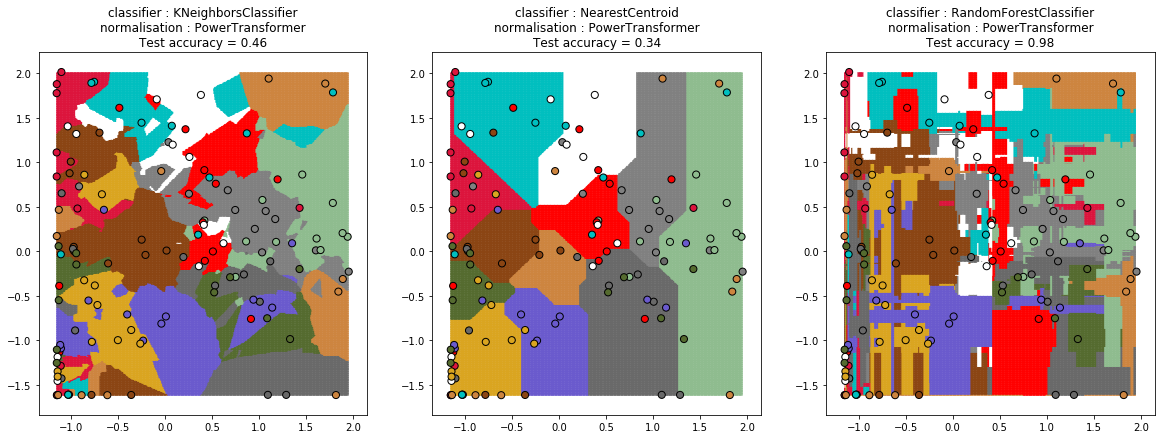

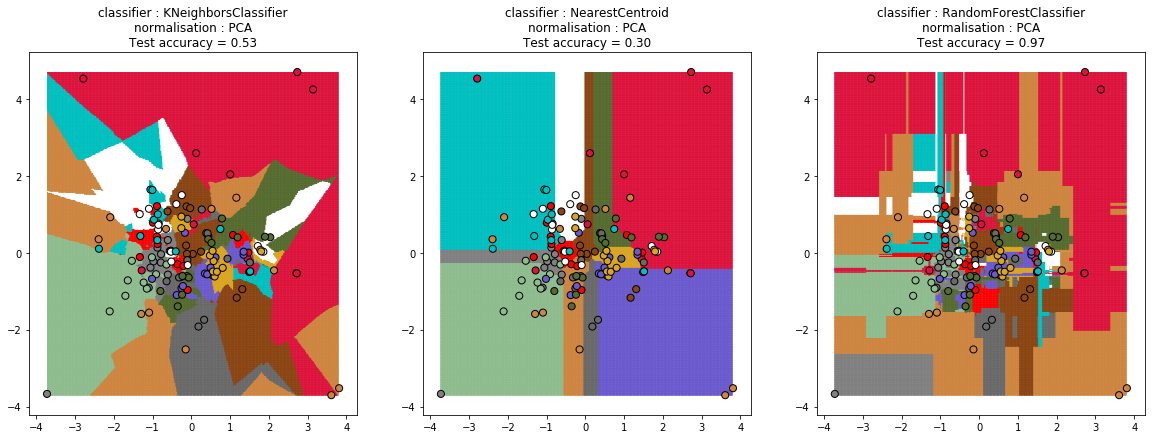

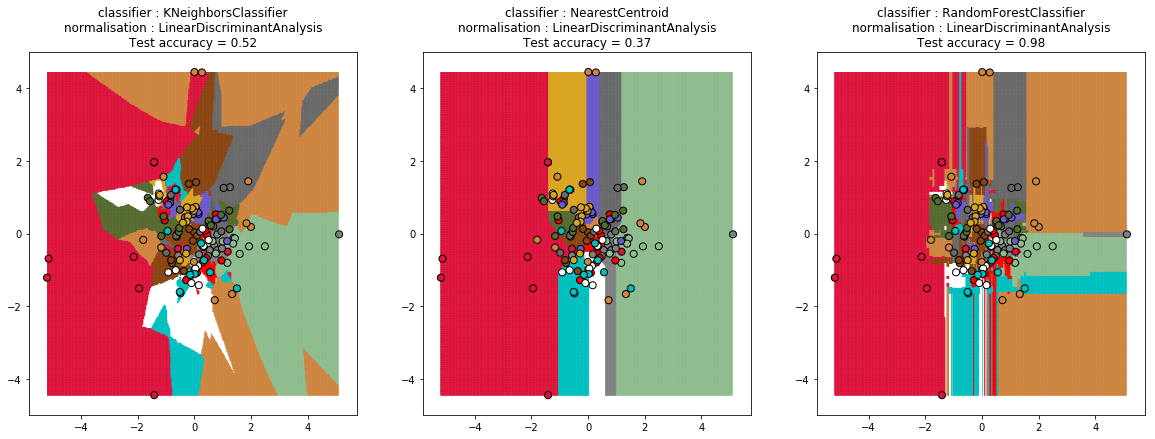

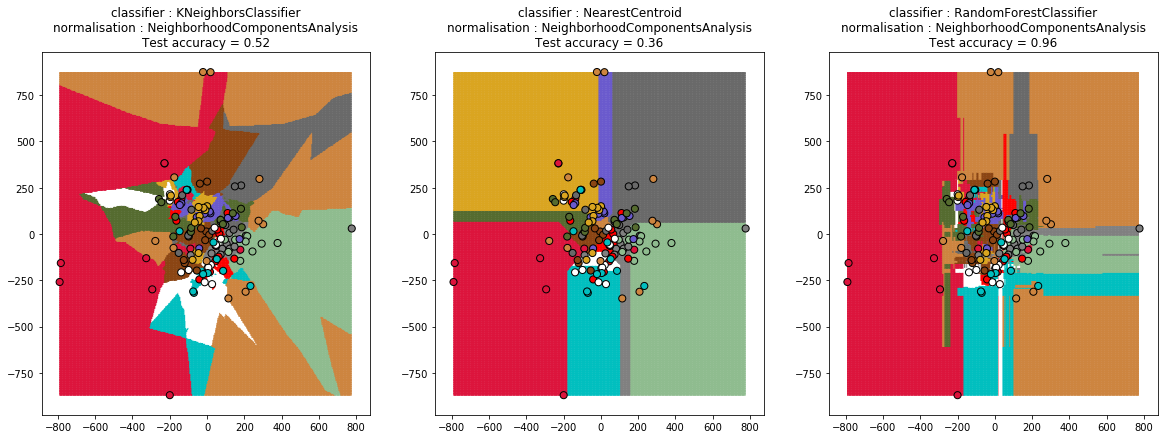

In [25]:
random_state = 0


X = X0

std = pre.StandardScaler()
qn = pre.QuantileTransformer(output_distribution='normal', n_quantiles=int(132/5))
qu = pre.QuantileTransformer(output_distribution='uniform', n_quantiles=int(132/5))
rs = pre.RobustScaler(quantile_range=(25, 75))
pt = pre.PowerTransformer(method='yeo-johnson')

pca = make_pipeline(qn, PCA(n_components=2, random_state=random_state))
lda = make_pipeline(qn, LinearDiscriminantAnalysis(n_components=2))
nca = make_pipeline(qn, NeighborhoodComponentsAnalysis(n_components=2, random_state=random_state))

clf1 = KNeighborsClassifier()#n_neighbors=4)#, weights='distance')
clf2 = NearestCentroid(metric='manhattan')
clf3 = RandomForestClassifier()
'''n_estimators=100, criterion='gini', max_features=None,
                              min_samples_split=6, max_leaf_nodes=None)
'''

CLF = [('KNeighborsClassifier', clf1), ('NearestCentroid', clf2), ('RandomForestClassifier', clf3)]
dim_reduction_methods = [('None', X), ('StandardScaler', std),
                         ('QuantileTransformer_normal', qn), ('QuantileTransformer_uniform', qu),
                         ('RobustScaler', rs), ('PowerTransformer', pt),
                         ('PCA', pca), ('LinearDiscriminantAnalysis', lda),
                         ('NeighborhoodComponentsAnalysis', nca)]



for i, (name, model) in enumerate(dim_reduction_methods):
    
    fig, axs = plt.subplots(1, len(CLF), figsize=(20,20/len(CLF)))
    
    for c, (NAME, clf) in enumerate(CLF) :
        if name=='None' : 
            X_t = X
        else :
            model.fit(X, y)
            X_t = model.transform(X)
        clf.fit(X_t, y)
        acc_knn = clf.score(X_t, y)

        
        y_pred = clf.predict(X_t)
        x_min, x_max = X_t[:, 0].min(), X_t[:, 0].max()
        y_min, y_max = X_t[:, 1].min(), X_t[:, 1].max()

        '''x_min, x_max = x_min-x_min/100, x_max+x_max/100
        y_min, y_max = y_min-y_min/100, y_max+y_max/100'''

        if name == 'NCA' : h=0.2
        else :             h=0.01
        xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/500),
                             np.arange(y_min, y_max, (y_max-y_min)/500))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axs[c].pcolormesh(xx, yy, Z, cmap=cmap, alpha=0.5)
        #axs[c].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, s=50, edgecolors='k')

        axs[c].scatter(X_t[:, 0], X_t[:, 1], c=y, s=50, edgecolors='k', cmap=cmap)
        axs[c].set_title("classifier : {}\nnormalisation : {}\nTest accuracy = {:.2f}".format(NAME, name, acc_knn))


    plt.show()